In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

import hdbscan
import matplotlib.pyplot as plt

C:\Users\ellio\AppData\Local\Temp\ipykernel_39204\344241243.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data
df = pd.read_csv("../data/features.csv")

# Separate metadata and features
file_names = df["file_name"]
X = df.drop(columns=["file_name"])

In [3]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: remove near-constant features
X_scaled = VarianceThreshold(threshold=1e-3).fit_transform(X_scaled)

# Fit PCA
pca = PCA(
    n_components=2,
    random_state=42
)

X_pca = pca.fit_transform(X_scaled)

# Explained variance (sanity check)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.29049485 0.21590365]
Total explained variance: 0.5063985026688523


In [4]:
# Fit HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    metric="euclidean"
)

labels = clusterer.fit_predict(X_pca)

# Attach cluster labels
df["cluster"] = labels


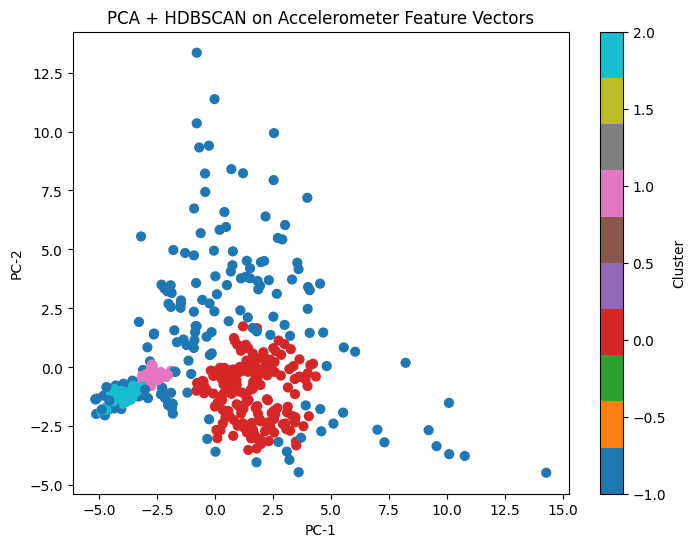

In [5]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap="tab10",
    s=40
)
plt.colorbar(label="Cluster")
plt.title("PCA + HDBSCAN on Accelerometer Feature Vectors")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()
